### <h1> Task 3 <h1> (Одновременное заполнение векторов и подсчёт их скалярного произведения при помощи sections)

In [43]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot

In [44]:
data_sections = pd.read_csv('data/scalar_sections.csv')
data_reduction = pd.read_csv('data/scalar_reduction.csv')
display(data_sections)
display(data_reduction)

,Num_Threads,Iter,Time
0,1,90,87.1
1,1,900,33.1
2,1,9000,141.0
3,1,90000,1119.9
4,1,900000,11400.6
...,...,...,...
91,16,900,26.4
92,16,9000,119.7
93,16,90000,1008.5
94,16,900000,9237.6


,Num_Threads,Iter,Time
0,1,90,53
1,2,90,44
2,3,90,52
3,4,90,39
4,5,90,37
...,...,...,...
91,12,9000000,23040
92,13,9000000,24107
93,14,9000000,21822
94,15,9000000,19764


In [45]:
labels = ['Sections', 'Reduction']

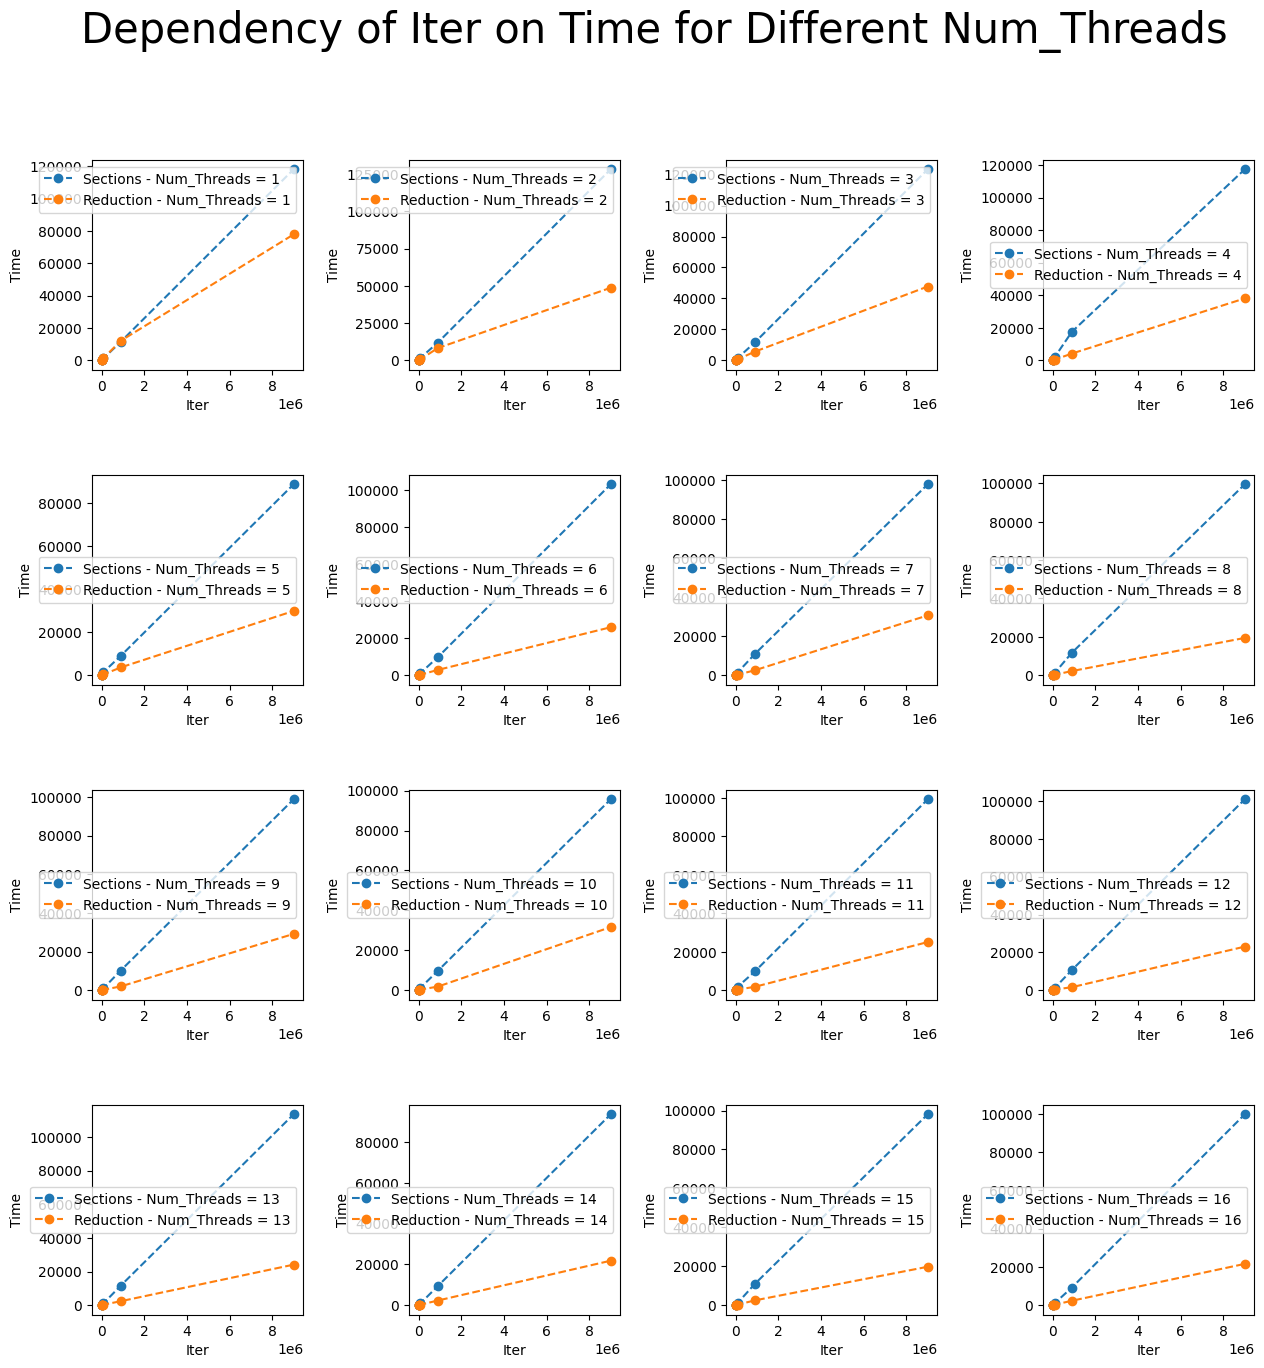

In [46]:
thread_groups_atomic = data_sections.groupby('Num_Threads')
thread_groups_reduction = data_reduction.groupby('Num_Threads')

thread_groups = [thread_groups_atomic, thread_groups_reduction]
time_iter_plot(thread_groups, labels)

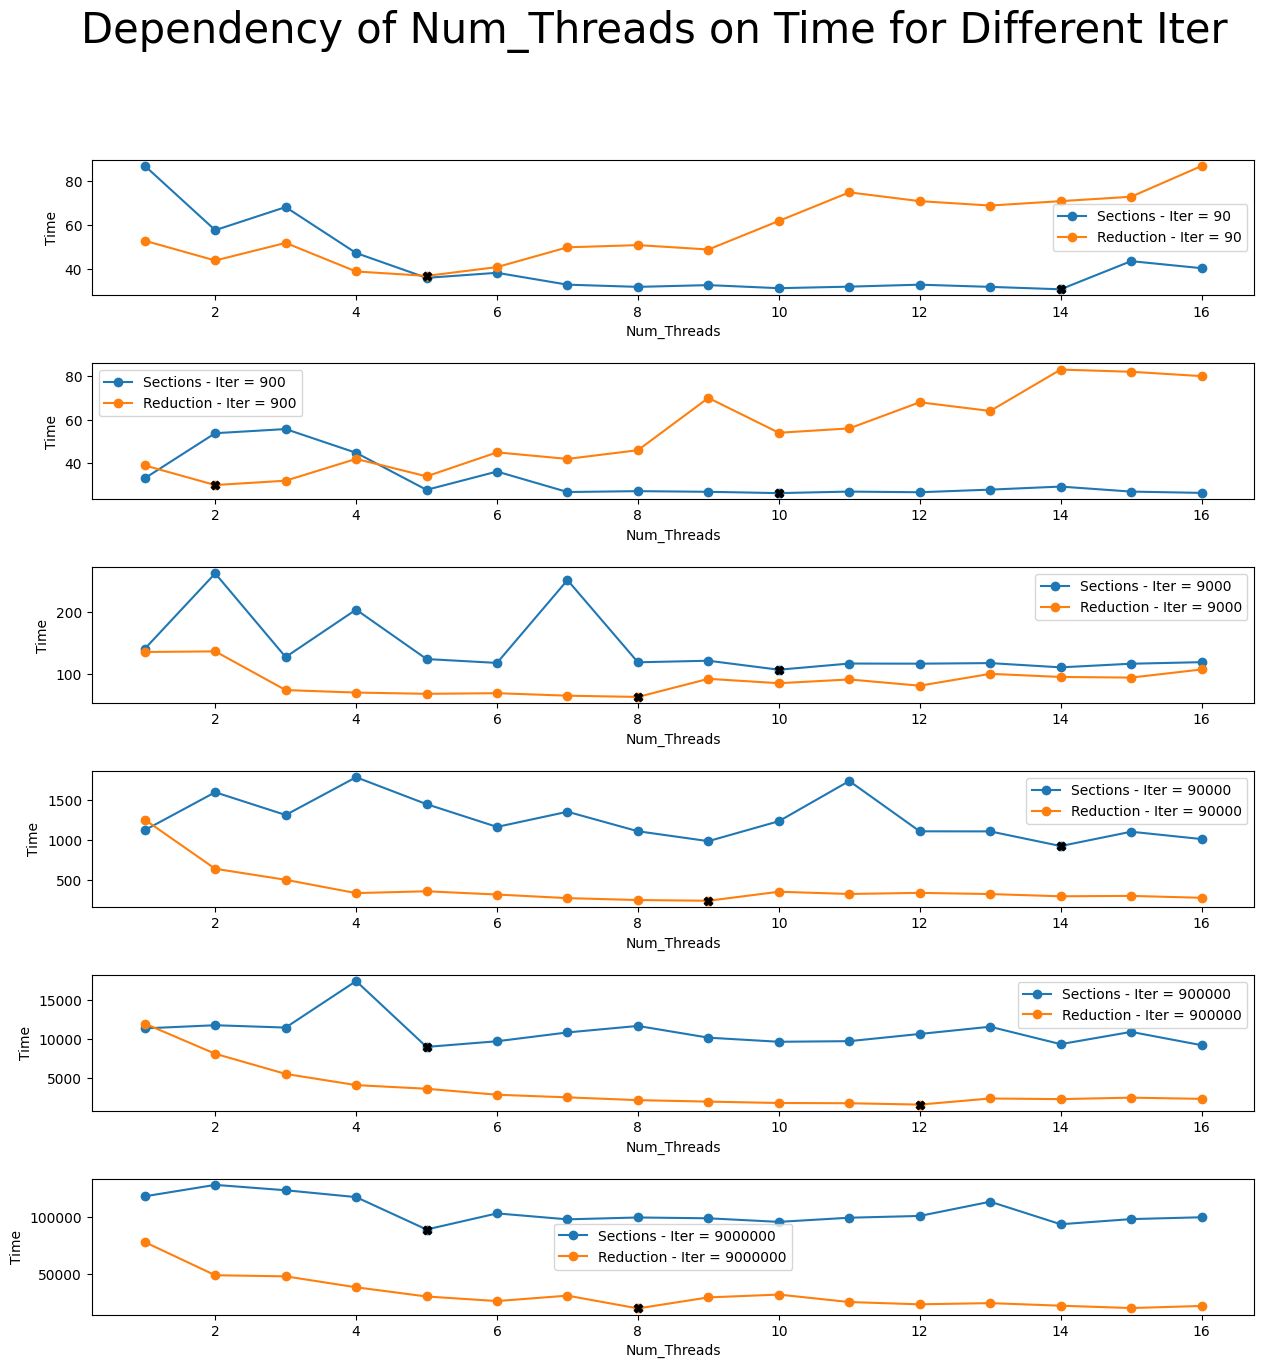

In [47]:
iter_groups_atomic = data_sections.groupby('Iter', as_index=False)
iter_groups_reduction = data_reduction.groupby('Iter', as_index=False)

iter_groups = [iter_groups_atomic, iter_groups_reduction]
time_thread_plot(iter_groups, labels)

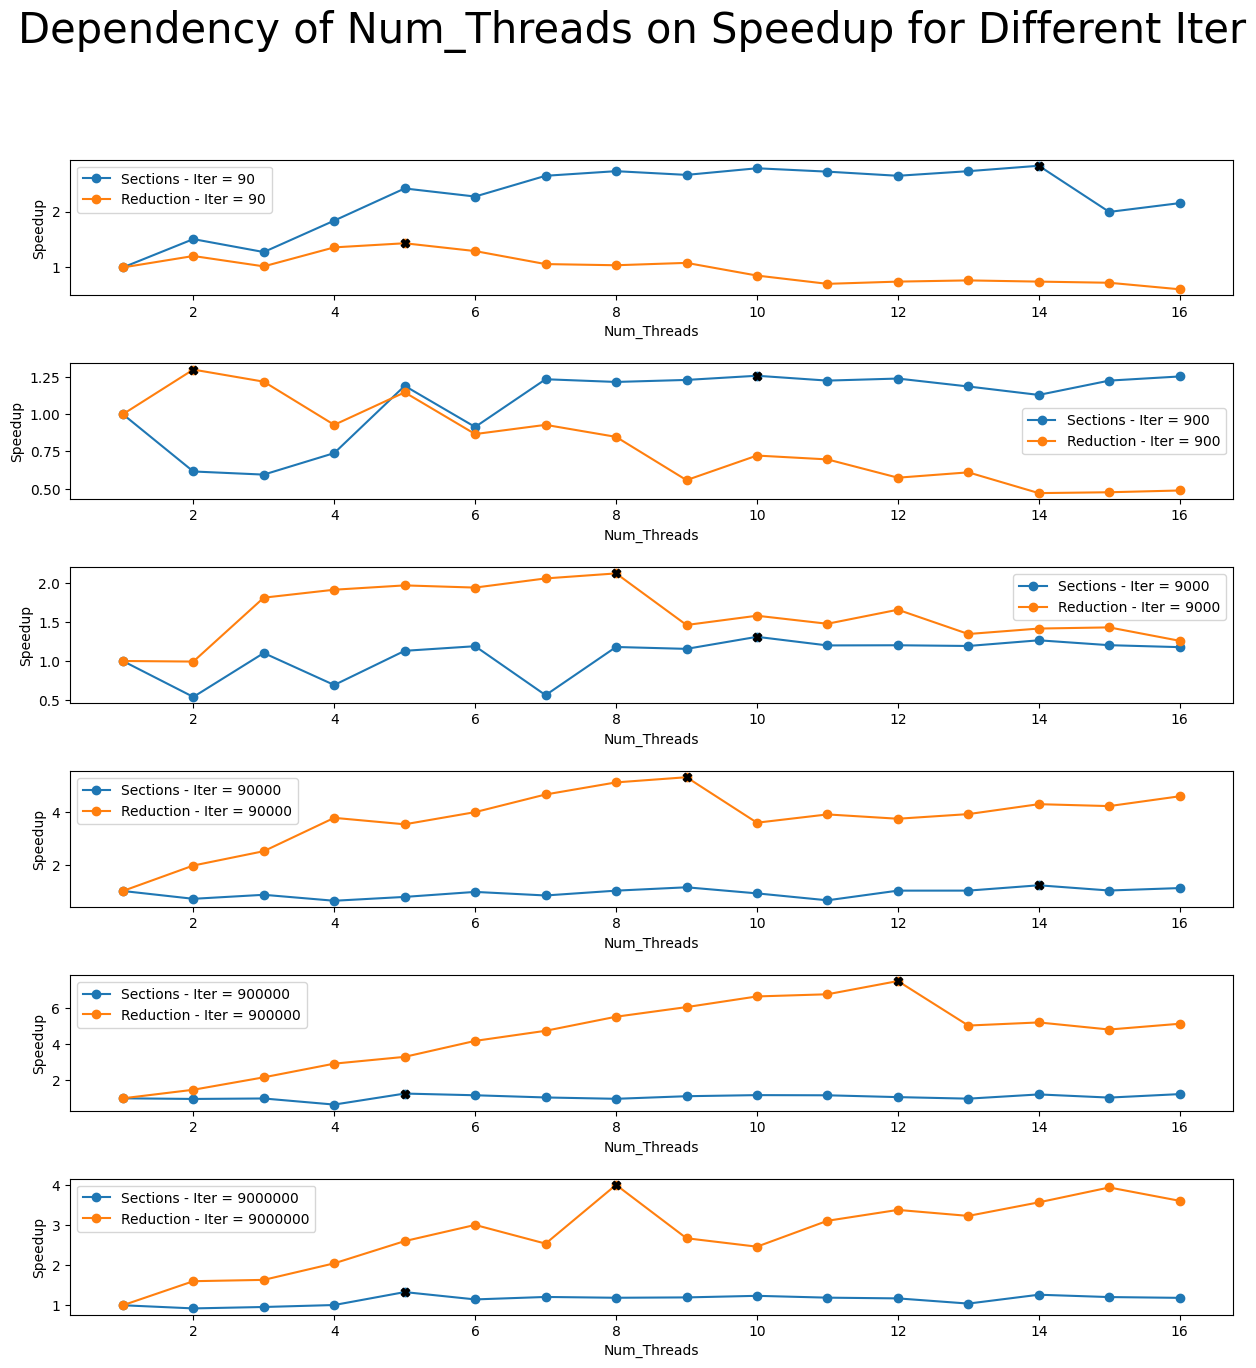

In [48]:
speedup_plot(iter_groups, labels)

# Вывод:
Из представленных графиков можно составить следующий рейтинг производительности для разных способов организации взаимоисключения: 
1. _Reduction_
2. _Atomic_
3. _Critical_
4. _Lock_
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 